<p style="text-align:center">
    <a href="https://skills.network" target="_blank">
    <img src="https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/assets/logos/SN_web_lightmode.png" width="200" alt="Skills Network Logo"  />
    </a>
</p>


# **Bubble Plots**


Estimated time needed: **30** minutes


In this lab, you will focus on visualizing data.

The dataset will be directly loaded into pandas for analysis and visualization.

You will use various visualization techniques to explore the data and uncover key trends.


## Objectives


In this lab, you will perform the following:


-   Visualize the distribution of data.

-   Visualize the relationship between two data features.

-   Visualize composition of data.

-   Visualize comparison of data.


#### Setup: Working with the Database
**Install and import the needed libraries**


In [1]:
!pip install pandas 
!pip install matplotlib

import pandas as pd
import matplotlib.pyplot as plt

**Download and connect to the database file containing survey data.**


To start, download and load the dataset into a `pandas` DataFrame.



In [2]:
# Step 1: Download the dataset
!wget -O survey-data.csv https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/n01PQ9pSmiRX6520flujwQ/survey-data.csv

# Load the data
df = pd.read_csv("survey-data.csv")

# Display the first few rows of the data to understand its structure
df.head()


--2025-09-10 03:38:07--  https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/n01PQ9pSmiRX6520flujwQ/survey-data.csv
Resolving cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud (cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud)... 169.63.118.104
Connecting to cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud (cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud)|169.63.118.104|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 159525875 (152M) [text/csv]
Saving to: ‘survey-data.csv’

survey-data.csv     100%[===================>] 152.13M  60.2MB/s    in 2.5s    

2025-09-10 03:38:10 (60.2 MB/s) - ‘survey-data.csv’ saved [159525875/159525875]



,ResponseId,MainBranch,Age,Employment,RemoteWork,Check,CodingActivities,EdLevel,LearnCode,LearnCodeOnline,...,JobSatPoints_6,JobSatPoints_7,JobSatPoints_8,JobSatPoints_9,JobSatPoints_10,JobSatPoints_11,SurveyLength,SurveyEase,ConvertedCompYearly,JobSat
0,1,I am a developer by profession,Under 18 years old,"Employed, full-time",Remote,Apples,Hobby,Primary/elementary school,Books / Physical media,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2,I am a developer by profession,35-44 years old,"Employed, full-time",Remote,Apples,Hobby;Contribute to open-source projects;Other...,"Bachelor’s degree (B.A., B.S., B.Eng., etc.)",Books / Physical media;Colleague;On the job tr...,Technical documentation;Blogs;Books;Written Tu...,...,0.0,0.0,0.0,0.0,0.0,0.0,NaN,NaN,NaN,NaN
2,3,I am a developer by profession,45-54 years old,"Employed, full-time",Remote,Apples,Hobby;Contribute to open-source projects;Other...,"Master’s degree (M.A., M.S., M.Eng., MBA, etc.)",Books / Physical media;Colleague;On the job tr...,Technical documentation;Blogs;Books;Written Tu...,...,NaN,NaN,NaN,NaN,NaN,NaN,Appropriate in length,Easy,NaN,NaN
3,4,I am learning to code,18-24 years old,"Student, full-time",NaN,Apples,NaN,Some college/university study without earning ...,"Other online resources (e.g., videos, blogs, f...",Stack Overflow;How-to videos;Interactive tutorial,...,NaN,NaN,NaN,NaN,NaN,NaN,Too long,Easy,NaN,NaN
4,5,I am a developer by profession,18-24 years old,"Student, full-time",NaN,Apples,NaN,"Secondary school (e.g. American high school, G...","Other online resources (e.g., videos, blogs, f...",Technical documentation;Blogs;Written Tutorial...,...,NaN,NaN,NaN,NaN,NaN,NaN,Too short,Easy,NaN,NaN


### Task 1: Exploring Data Distributions Using Bubble Plots


#### 1. Bubble Plot for Age vs. Frequency of Participation


- Visualize the relationship between respondents’ age and their participation frequency (`SOPartFreq`) using a bubble plot.

- Use the size of the bubbles to represent their job satisfaction (`JobSat`).


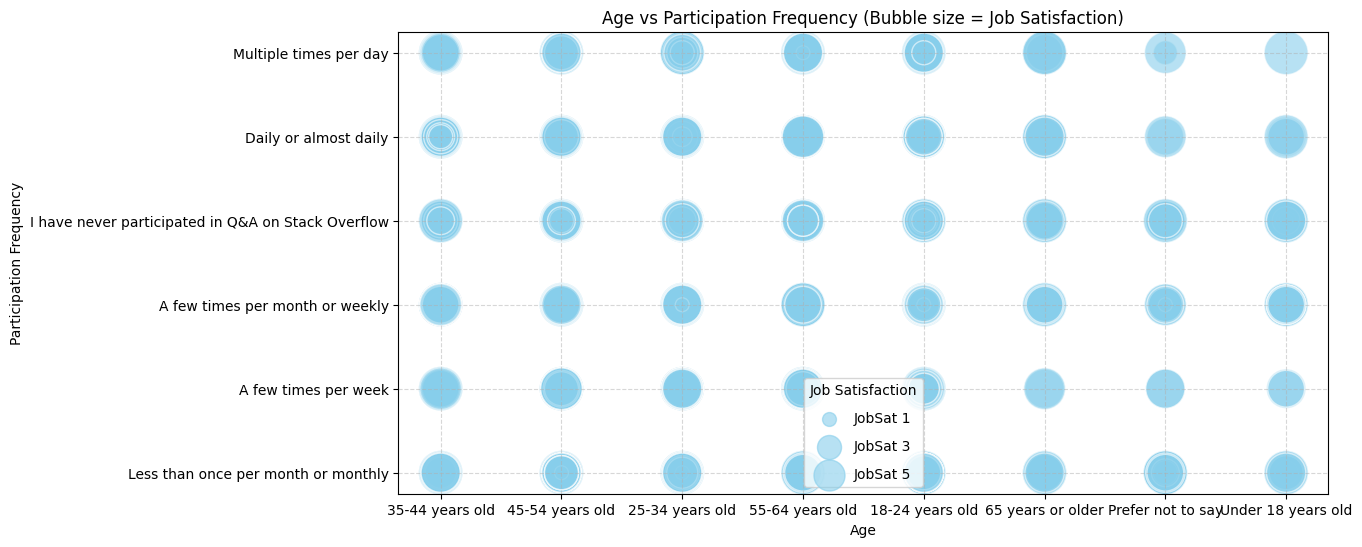

In [4]:
# Remove rows with missing values in the relevant columns
df_clean = df[['Age', 'SOPartFreq', 'JobSat']].dropna()

# Convert JobSat to numeric if needed
df_clean['JobSat'] = pd.to_numeric(df_clean['JobSat'], errors='coerce')
df_clean = df_clean.dropna()  # Remove rows where JobSat could not be converted

# Optionally, map bubble size to JobSat
bubble_size = df_clean['JobSat'] * 100  # Scale factor for visibility
import matplotlib.pyplot as plt

plt.figure(figsize=(12,6))
plt.scatter(df_clean['Age'], df_clean['SOPartFreq'],
            s=bubble_size,  # Bubble size represents JobSat
            alpha=0.6,
            color='skyblue',
            edgecolors='w')

plt.title('Age vs Participation Frequency (Bubble size = Job Satisfaction)')
plt.xlabel('Age')
plt.ylabel('Participation Frequency')
plt.grid(True, linestyle='--', alpha=0.5)

# Optional: add a legend for bubble size
for js in [1, 3, 5]:  # example job satisfaction levels
    plt.scatter([], [], s=js*100, c='skyblue', alpha=0.6,
                label=f'JobSat {js}')
plt.legend(scatterpoints=1, frameon=True, labelspacing=1, title='Job Satisfaction')

plt.show()


#### 2. Bubble Plot for Compensation vs. Job Satisfaction


-Visualize the relationship between yearly compensation (`ConvertedCompYearly`) and job satisfaction (`JobSat`).

- Use the size of the bubbles to represent respondents’ age.


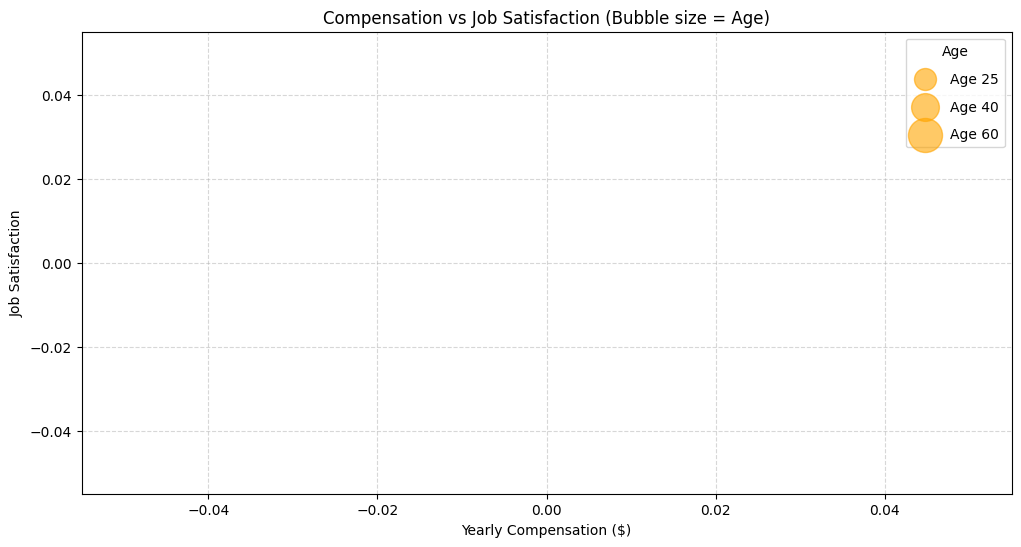

In [5]:
import pandas as pd
import matplotlib.pyplot as plt

# Load the CSV if not already loaded
df = pd.read_csv("survey-data.csv")

# Keep only relevant columns and drop missing values
df_clean = df[['ConvertedCompYearly', 'JobSat', 'Age']].dropna()

# Convert columns to numeric if needed
df_clean['ConvertedCompYearly'] = pd.to_numeric(df_clean['ConvertedCompYearly'], errors='coerce')
df_clean['JobSat'] = pd.to_numeric(df_clean['JobSat'], errors='coerce')
df_clean['Age'] = pd.to_numeric(df_clean['Age'], errors='coerce')

df_clean = df_clean.dropna()
# Scale age to use as bubble size
bubble_size = df_clean['Age'] * 10  # Adjust scaling factor for visibility
plt.figure(figsize=(12,6))
plt.scatter(df_clean['ConvertedCompYearly'], df_clean['JobSat'],
            s=bubble_size,  # Bubble size represents Age
            alpha=0.6,
            color='orange',
            edgecolors='w')

plt.title('Compensation vs Job Satisfaction (Bubble size = Age)')
plt.xlabel('Yearly Compensation ($)')
plt.ylabel('Job Satisfaction')
plt.grid(True, linestyle='--', alpha=0.5)

# Optional: add example bubble sizes for legend
for age in [25, 40, 60]:  # example ages
    plt.scatter([], [], s=age*10, c='orange', alpha=0.6, label=f'Age {age}')
plt.legend(scatterpoints=1, frameon=True, labelspacing=1, title='Age')

plt.show()


### Task 2: Analyzing Relationships Using Bubble Plots


#### 1. Bubble Plot of Technology Preferences by Age

- Visualize the popularity of programming languages respondents have worked with (`LanguageHaveWorkedWith`) across age groups.

- Use bubble size to represent the frequency of each language.



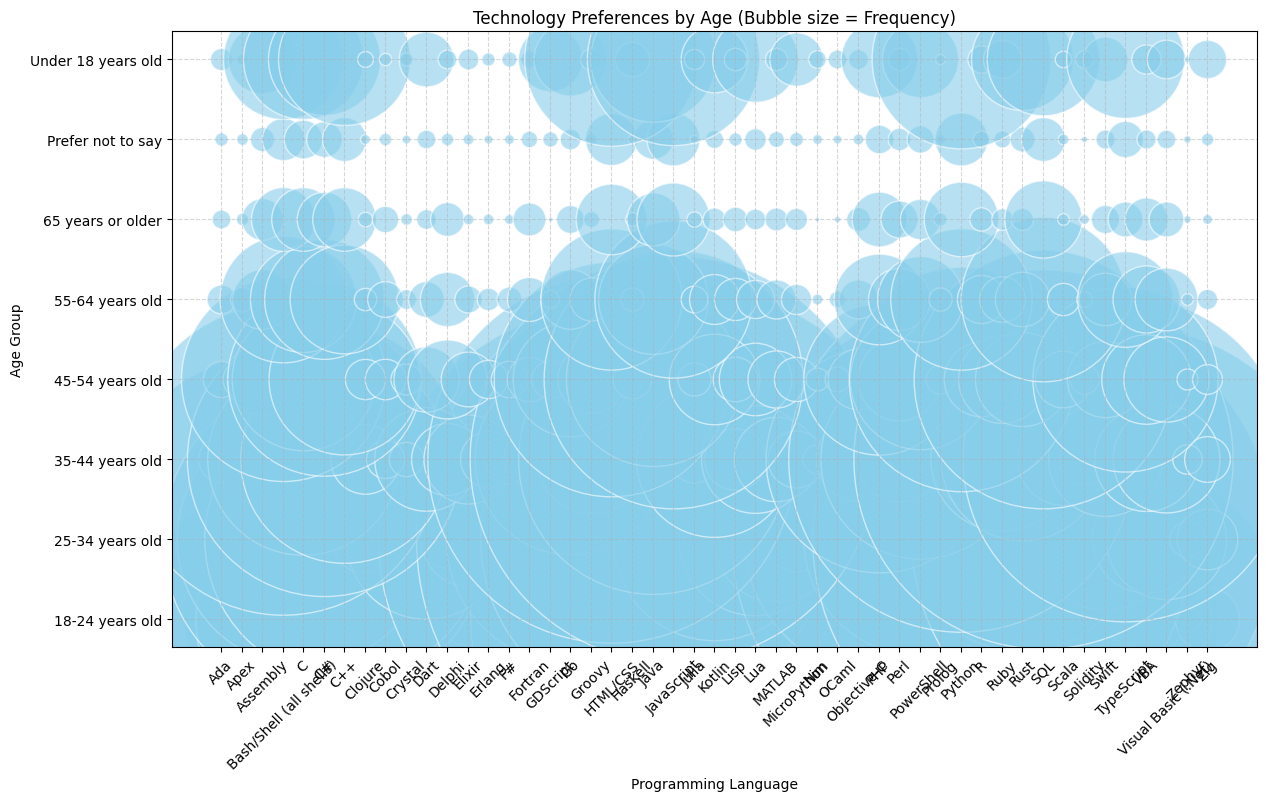

In [6]:
#import pandas as pd
import matplotlib.pyplot as plt

# Load the dataset
df = pd.read_csv("survey-data.csv")

# Keep relevant columns and drop missing values
df_clean = df[['Age', 'LanguageHaveWorkedWith']].dropna()

# Split multiple languages if needed (assuming languages are comma-separated)
df_clean = df_clean.assign(Language=df_clean['LanguageHaveWorkedWith'].str.split(';')).explode('Language')

# Count frequency of each language by age group
lang_age_counts = df_clean.groupby(['Age', 'Language']).size().reset_index(name='Frequency')
# Scale frequency for bubble size
lang_age_counts['BubbleSize'] = lang_age_counts['Frequency'] * 10  # Adjust scaling factor
plt.figure(figsize=(14,8))

# Plot each point
for _, row in lang_age_counts.iterrows():
    plt.scatter(row['Language'], row['Age'], 
                s=row['BubbleSize'], 
                alpha=0.6, 
                color='skyblue', 
                edgecolors='w')

plt.title('Technology Preferences by Age (Bubble size = Frequency)')
plt.xlabel('Programming Language')
plt.ylabel('Age Group')
plt.xticks(rotation=45)
plt.grid(True, linestyle='--', alpha=0.5)

plt.show()


#### 2. Bubble Plot for Preferred Databases vs. Job Satisfaction

- Explore the relationship between preferred databases (`DatabaseWantToWorkWith`) and job satisfaction.

- Use bubble size to indicate the number of respondents for each database.


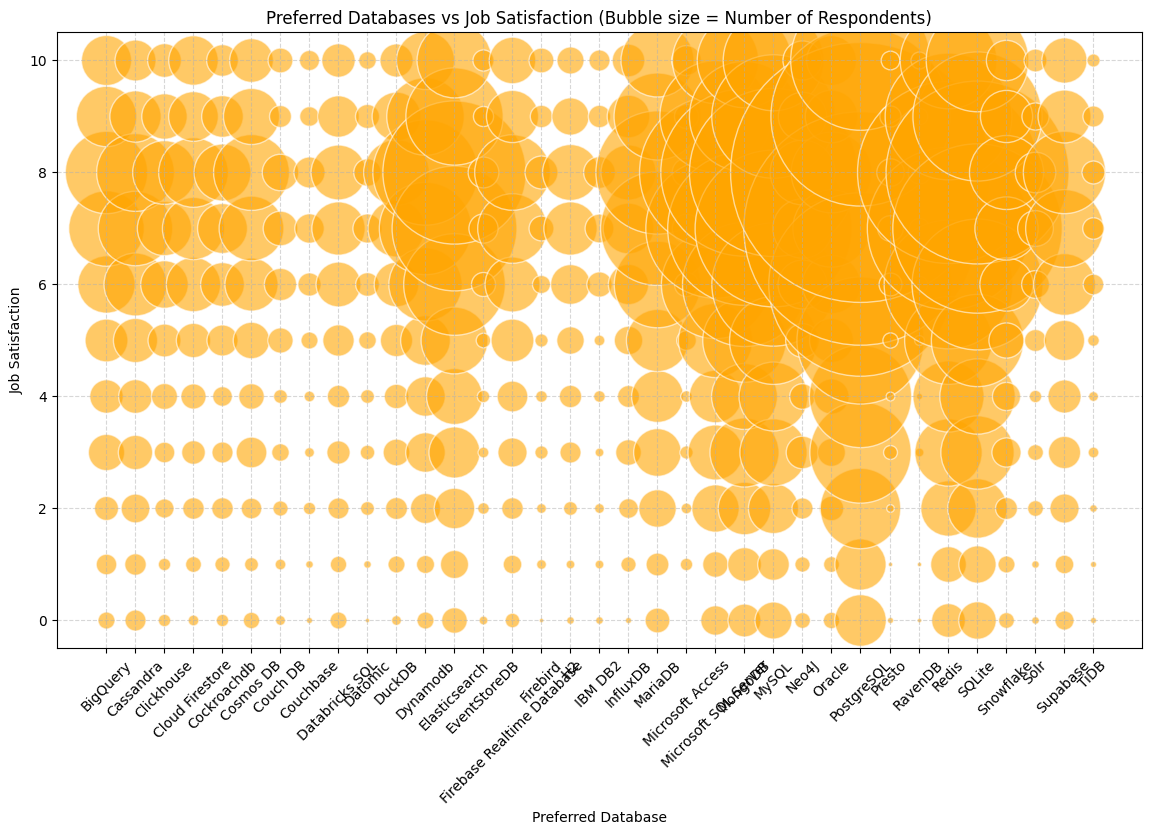

In [7]:
import pandas as pd
import matplotlib.pyplot as plt

# Load the dataset
df = pd.read_csv("survey-data.csv")

# Keep relevant columns and drop missing values
df_clean = df[['DatabaseWantToWorkWith', 'JobSat']].dropna()

# Split multiple databases if needed (assuming semicolon-separated)
df_clean = df_clean.assign(Database=df_clean['DatabaseWantToWorkWith'].str.split(';')).explode('Database')

# Count the number of respondents for each database-job satisfaction pair
db_counts = df_clean.groupby(['Database', 'JobSat']).size().reset_index(name='RespondentCount')
# Scale respondent count for bubble size
db_counts['BubbleSize'] = db_counts['RespondentCount'] * 10  # Adjust scaling factor for visibility
plt.figure(figsize=(14,8))

# Plot each point
for _, row in db_counts.iterrows():
    plt.scatter(row['Database'], row['JobSat'], 
                s=row['BubbleSize'], 
                alpha=0.6, 
                color='orange', 
                edgecolors='w')

plt.title('Preferred Databases vs Job Satisfaction (Bubble size = Number of Respondents)')
plt.xlabel('Preferred Database')
plt.ylabel('Job Satisfaction')
plt.xticks(rotation=45)
plt.grid(True, linestyle='--', alpha=0.5)

plt.show()


### Task 3: Comparing Data Using Bubble Plots


#### 1. Bubble Plot for Compensation Across Developer Roles

- Visualize compensation (`ConvertedCompYearly`) across different developer roles (`DevType`).

- Use bubble size to represent job satisfaction.


In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

# Load the dataset
df = pd.read_csv("survey-data.csv")

# Keep relevant columns and drop missing values
df_clean = df[['DevType', 'ConvertedCompYearly', 'JobSat']].dropna()

# Split multiple developer roles if needed (assuming semicolon-separated)
df_clean = df_clean.assign(DevType=df_clean['DevType'].str.split(';')).explode('DevType')

# Convert numeric columns
df_clean['ConvertedCompYearly'] = pd.to_numeric(df_clean['ConvertedCompYearly'], errors='coerce')
df_clean['JobSat'] = pd.to_numeric(df_clean['JobSat'], errors='coerce')
df_clean = df_clean.dropna()

# Scale job satisfaction for bubble size
bubble_size = df_clean['JobSat'] * 50  # Adjust scaling factor for visibility
plt.figure(figsize=(14,8))

# Plot each point
for _, row in df_clean.iterrows():
    plt.scatter(row['DevType'], row['ConvertedCompYearly'], 
                s=row['JobSat']*50,  # bubble size = JobSat
                alpha=0.6, 
                color='skyblue', 
                edgecolors='w')

plt.title('Compensation Across Developer Roles (Bubble size = Job Satisfaction)')
plt.xlabel('Developer Role')
plt.ylabel('Yearly Compensation ($)')
plt.xticks(rotation=45)
plt.grid(True, linestyle='--', alpha=0.5)

# Optional: add legend for bubble sizes
for js in [2, 4, 6]:  # example JobSat levels
    plt.scatter([], [], s=js*50, c='skyblue', alpha=0.6, label=f'JobSat {js}')
plt.legend(scatterpoints=1, frameon=True, labelspacing=1, title='Job Satisfaction')

plt.show()


#### 2. Bubble Plot for Collaboration Tools by Age

- Visualize the relationship between the collaboration tools used (`NEWCollabToolsHaveWorkedWith`) and age groups.

- Use bubble size to represent the frequency of tool usage.


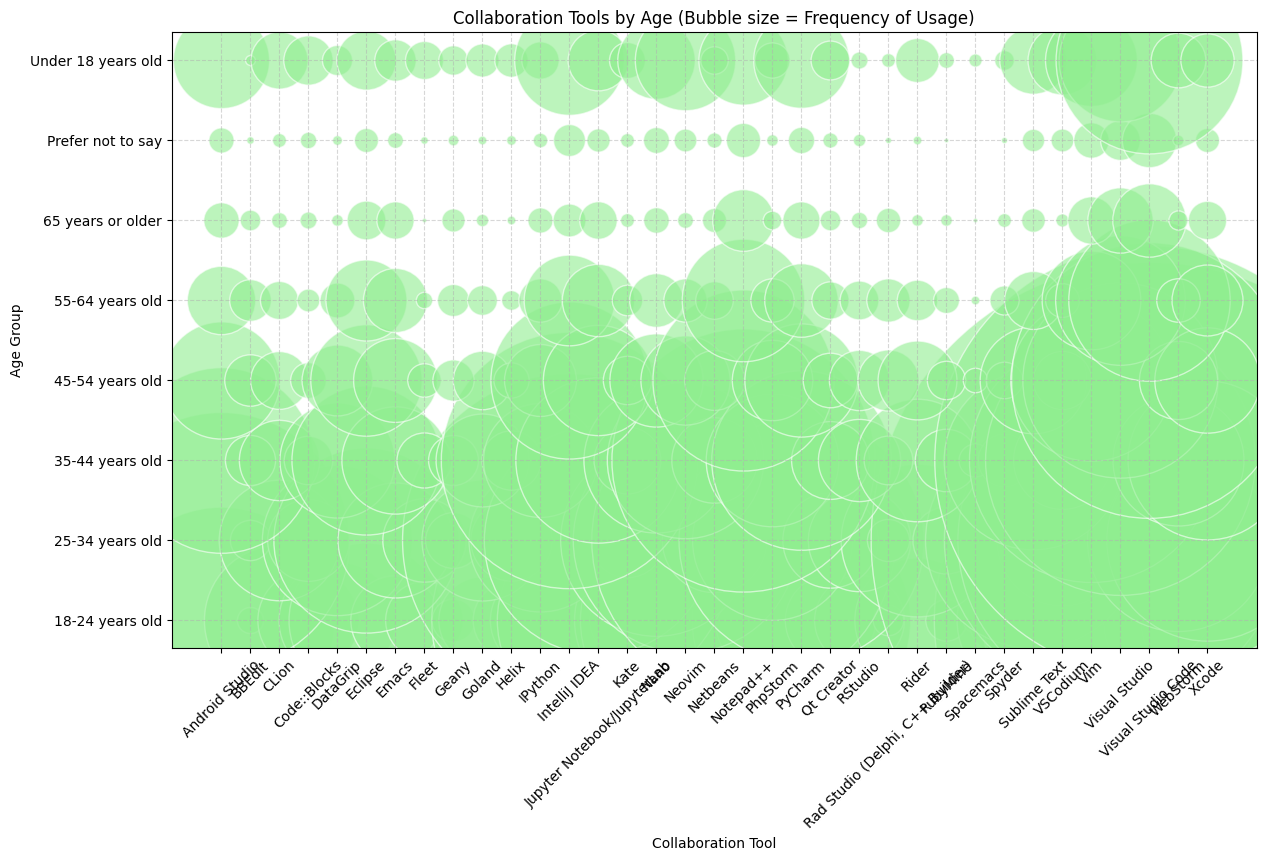

In [12]:
import pandas as pd
import matplotlib.pyplot as plt

# Load the dataset
df = pd.read_csv("survey-data.csv")

# Keep relevant columns and drop missing values
df_clean = df[['Age', 'NEWCollabToolsHaveWorkedWith']].dropna()

# Split multiple tools if needed (assuming semicolon-separated)
df_clean = df_clean.assign(Tool=df_clean['NEWCollabToolsHaveWorkedWith'].str.split(';')).explode('Tool')

# Count frequency of each tool by age group
tool_age_counts = df_clean.groupby(['Age', 'Tool']).size().reset_index(name='Frequency')
# Scale frequency for bubble size
tool_age_counts['BubbleSize'] = tool_age_counts['Frequency'] * 10  # Adjust scaling factor
plt.figure(figsize=(14,8))

# Plot each point
for _, row in tool_age_counts.iterrows():
    plt.scatter(row['Tool'], row['Age'], 
                s=row['BubbleSize'], 
                alpha=0.6, 
                color='lightgreen', 
                edgecolors='w')

plt.title('Collaboration Tools by Age (Bubble size = Frequency of Usage)')
plt.xlabel('Collaboration Tool')
plt.ylabel('Age Group')
plt.xticks(rotation=45)
plt.grid(True, linestyle='--', alpha=0.5)

plt.show()


### Task 4: Visualizing Technology Trends Using Bubble Plots


#### 1. Bubble Plot for Preferred Web Frameworks vs. Job Satisfaction

- Explore the relationship between preferred web frameworks (`WebframeWantToWorkWith`) and job satisfaction.

- Use bubble size to represent the number of respondents.



In [ ]:
plt.figure(figsize=(14,8))

# Plot each point
for _, row in framework_counts.iterrows():
    plt.scatter(row['WebFramework'], row['JobSat'], 
                s=row['BubbleSize'], 
                alpha=0.6, 
                color='purple', 
                edgecolors='w')

plt.title('Preferred Web Frameworks vs Job Satisfaction (Bubble size = Number of Respondents)')
plt.xlabel('Web Framework')
plt.ylabel('Job Satisfaction')
plt.xticks(rotation=45)
plt.grid(True, linestyle='--', alpha=0.5)

plt.show()


#### 2. Bubble Plot for Admired Technologies Across Countries

- Visualize the distribution of admired technologies (`LanguageAdmired`) across different countries (`Country`).

- Use bubble size to represent the frequency of admiration.



In [ ]:
plt.figure(figsize=(16,8))

# Plot each point
for _, row in admiration_counts.iterrows():
    plt.scatter(row['Language'], row['Country'], 
                s=row['BubbleSize'], 
                alpha=0.6, 
                color='teal', 
                edgecolors='w')

plt.title('Admired Technologies Across Countries (Bubble size = Frequency of Admiration)')
plt.xlabel('Technology / Language')
plt.ylabel('Country')
plt.xticks(rotation=45)
plt.grid(True, linestyle='--', alpha=0.5)

plt.show()


## Final Step: Review


After completing the lab, you will have extensively used bubble plots to gain insights into developer community preferences, demographics, compensation trends, and job satisfaction.


## Summary


After completing this lab, you will be able to:

- Create and interpret bubble plots to analyze relationships and compositions within datasets.

- Use bubble plots to explore developer preferences, compensation trends, and satisfaction levels.

- Apply bubble plots to visualize complex relationships involving multiple dimensions effectively.


## Authors:
Ayushi Jain


### Other Contributors:
- Rav Ahuja
- Lakshmi Holla
- Malika


<!--
## Change Log
|Date (YYYY-MM-DD)|Version|Changed By|Change Description|
|-|-|-|-|
|2024-10-29|1.2|Madhusudhan Moole|Updated lab|
|2024-10-16|1.1|Madhusudhan Moole|Updated lab|
|2024-10-15|1.0|Raghul Ramesh|Created lab|
--!>


Copyright © IBM Corporation. All rights reserved.
